In [1]:
#setup some general use functions and import file
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

ames = pd.read_csv("../../data/train.csv")

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# total observations/rows from training dataset
total = ames.shape[0]
total

1460

# MoSold

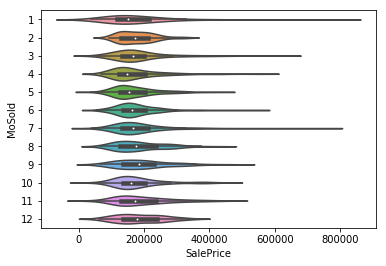

In [3]:
ames.MoSold = ames.MoSold.astype('category')
sns.violinplot(x="SalePrice", y='MoSold', data=ames)

In [4]:
mod = ols('SalePrice ~ MoSold',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
MoSold    6.651827e+10    11.0  0.957865  0.483352
Residual  9.141393e+12  1448.0       NaN       NaN


p = 0.483

In [5]:
group_ms = ames.groupby('MoSold')
group_ms.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
MoSold,,,,,,
1,58,10628863,39300,755000,183256.258621,121381.083473
2,52,9249864,93000,320000,177882.000000,52960.863135
3,106,19424916,52500,611657,183253.924528,86488.445599
4,141,24181960,68400,555000,171503.262411,77147.323106
5,204,35150683,37900,430000,172307.269608,68614.545198
6,253,44881121,55993,538000,177395.735178,69453.085881
7,234,43601499,40000,745000,186331.192308,91772.125395
8,122,22527523,64500,426000,184651.827869,73215.986647
9,63,12328042,67000,465000,195683.206349,83149.017391


In [6]:
#number of sales varies by month. Group into 'high sales' months (3-8) and low sales months (9-2)


# YearBuilt
- I will model this as a continuous variable.
- This would be transformed as: HouseAge = 2010 - YearBuilt

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


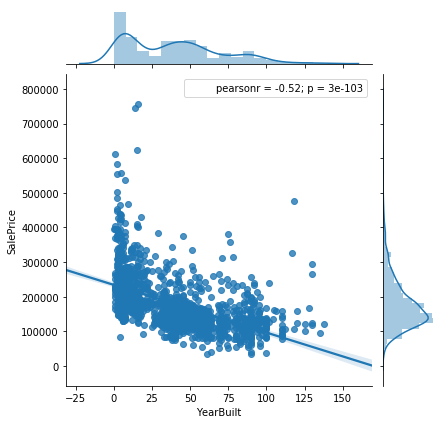

In [7]:
HouseAge = 2010 - ames.YearBuilt
sns.jointplot(x=HouseAge, y='SalePrice', data=ames, kind="reg") 

In [8]:
stats.linregress(HouseAge, ames.SalePrice)

LinregressResult(slope=-1375.373467936892, intercept=234192.42482079676, rvalue=-0.5228973328794968, pvalue=2.990229099013855e-103, stderr=58.71738268910999)

p = 2.99e-103, slope = -1375.373 

# YearRemodAdd
- I will model this as a continuous variable.
- This would be transformed as: LastRemod = 2010 - YearBuilt

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


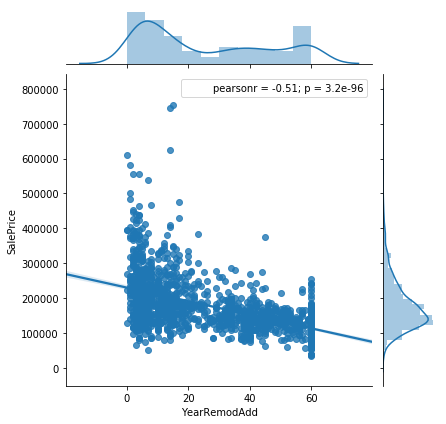

In [9]:
LastRemod = 2010 - ames.YearRemodAdd
sns.jointplot(x=LastRemod, y='SalePrice', data=ames, kind="reg") 

In [10]:
stats.linregress(LastRemod, ames.SalePrice)

LinregressResult(slope=-1951.2994060556618, intercept=229965.63630453325, rvalue=-0.5071009671113863, pvalue=3.164948241917543e-96, stderr=86.8562087968298)

# RoofStyle

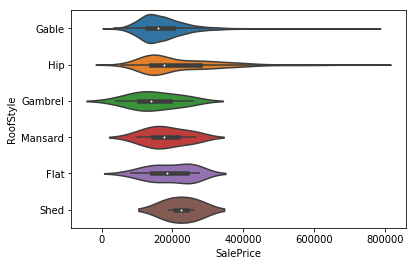

In [11]:
sns.violinplot(x="SalePrice", y='RoofStyle', data=ames)

In [12]:
mod = ols('SalePrice ~ RoofStyle',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
RoofStyle  5.312655e+11     5.0  17.805497  3.653523e-17
Residual   8.676646e+12  1454.0        NaN           NaN


In [13]:
group_rs = ames.groupby('RoofStyle')
group_rs.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
RoofStyle,,,,,,
Flat,13,2530970,82000,274970,194690.000000,62522.963515
Gable,1141,195663194,34900,755000,171483.956179,66331.237296
Gambrel,11,1638000,40000,259500,148909.090909,67013.527807
Hip,286,62598803,55000,745000,218876.933566,111549.603563
Mansard,7,1263979,100000,265979,180568.428571,58057.624627
Shed,2,450000,190000,260000,225000.000000,49497.474683


In [14]:
#percentages and missingness
print(round(100*group_rs.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_rs.size())))

RoofStyle
Flat        0.9
Gable      78.2
Gambrel     0.8
Hip        19.6
Mansard     0.5
Shed        0.1
dtype: float64

There are 0 missing values


In [15]:
#Let's reevaluate as Gable roofs (common) vs everything else (uncommon).
ames.RoofStyle = ['gable' if rs == 'Gable' else 'not_gable' for rs in ames.RoofStyle]

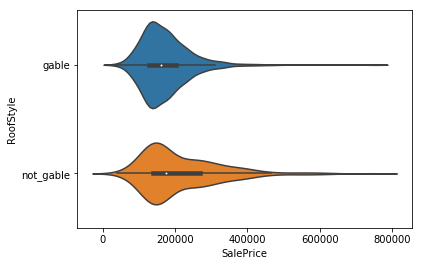

In [16]:
sns.violinplot(x="SalePrice", y='RoofStyle', data=ames)

In [17]:
group_rs2 = ames.groupby('RoofStyle')
group_rs2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
RoofStyle,,,,,,
gable,1141,195663194,34900,755000,171483.956179,66331.237296
not_gable,319,68481752,40000,745000,214676.338558,108259.686964


In [18]:
stats.ttest_ind(ames.SalePrice[ames.RoofStyle == 'gable'], 
                ames.SalePrice[ames.RoofStyle == 'not_gable'], equal_var = False)

Ttest_indResult(statistic=-6.778962338095825, pvalue=4.5326935656027866e-11)

# RoofMatl

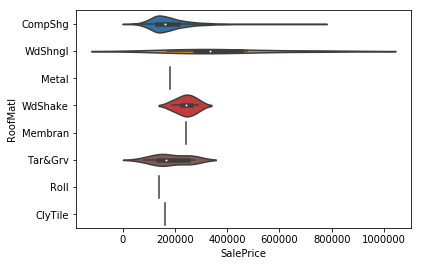

In [19]:
sns.violinplot(x="SalePrice", y='RoofMatl', data=ames)

In [20]:
mod = ols('SalePrice ~ RoofMatl',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F        PR(>F)
RoofMatl  2.892493e+11     7.0  6.727305  7.231445e-08
Residual  8.918662e+12  1452.0       NaN           NaN


In [21]:
group_rm = ames.groupby('RoofMatl')
group_rm.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
RoofMatl,,,,,,
ClyTile,1,160000,160000,160000,160000.000000,NaN
CompShg,1434,257838476,34900,745000,179803.679219,77722.388636
Membran,1,241500,241500,241500,241500.000000,NaN
Metal,1,180000,180000,180000,180000.000000,NaN
Roll,1,137000,137000,137000,137000.000000,NaN
Tar&Grv,11,2039470,82000,274970,185406.363636,65430.141720
WdShake,5,1207000,190000,287000,241400.000000,36218.779659
WdShngl,6,2341500,168500,755000,390250.000000,206969.019421


In [22]:
#percentages and missingness
print(round(100*group_rm.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_rm.size())))

RoofMatl
ClyTile     0.1
CompShg    98.2
Membran     0.1
Metal       0.1
Roll        0.1
Tar&Grv     0.8
WdShake     0.3
WdShngl     0.4
dtype: float64

There are 0 missing values


In [23]:
# Drop, this is >98% CompShng ... does not meet our threshold of 5% 'other'

# Exterior1st

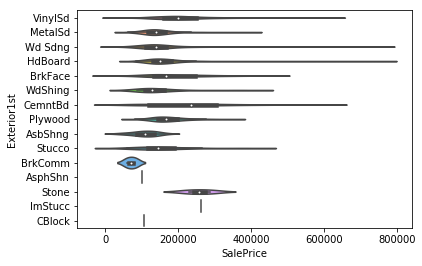

In [24]:
sns.violinplot(x="SalePrice", y='Exterior1st', data=ames)

In [25]:
mod = ols('SalePrice ~ Exterior1st',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df          F        PR(>F)
Exterior1st  1.406721e+12    14.0  18.611743  2.586089e-43
Residual     7.801190e+12  1445.0        NaN           NaN


In [26]:
group_ef = ames.groupby('Exterior1st')
group_ef.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'].sort_values(by=['sum'])

,count,sum,min,max,mean,std
Exterior1st,,,,,,
AsphShn,1,100000,100000,100000,100000.000000,NaN
CBlock,1,105000,105000,105000,105000.000000,NaN
BrkComm,2,142000,60000,82000,71000.000000,15556.349186
ImStucc,1,262000,262000,262000,262000.000000,NaN
Stone,2,517000,230000,287000,258500.000000,40305.086528
AsbShng,20,2147711,35311,165500,107385.550000,33756.480660
WdShing,26,3917032,87000,385000,150655.076923,72507.530741
Stucco,25,4074750,58500,381000,162990.000000,83307.246529
BrkFace,50,9728650,40000,430000,194573.000000,82841.914370


In [27]:
#percentages and missingness
print(round(100*group_ef.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_ef.size())))

Exterior1st
AsbShng     1.4
AsphShn     0.1
BrkComm     0.1
BrkFace     3.4
CBlock      0.1
CemntBd     4.2
HdBoard    15.2
ImStucc     0.1
MetalSd    15.1
Plywood     7.4
Stone       0.1
Stucco      1.7
VinylSd    35.3
Wd Sdng    14.1
WdShing     1.8
dtype: float64

There are 0 missing values


In [28]:
# a few tthings - Wd Sdng and WdShing are same? double check
# sort by common/uncommon. top 4 types (most) vs uncommon


# Exterior2nd

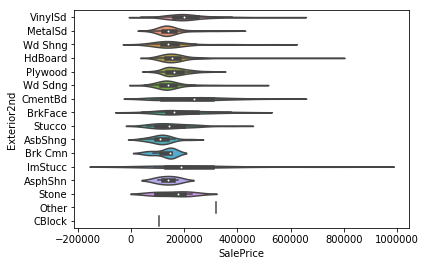

In [29]:
sns.violinplot(x="SalePrice", y='Exterior2nd', data=ames)

In [30]:
mod = ols('SalePrice ~ Exterior2nd',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df         F        PR(>F)
Exterior2nd  1.416452e+12    15.0  17.50084  4.842186e-43
Residual     7.791460e+12  1444.0       NaN           NaN


In [31]:
group_es = ames.groupby('Exterior2nd')
group_es.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
Exterior2nd,,,,,,
AsbShng,20,2281211,35311,225000,114060.550000,42315.043608
AsphShn,3,414000,100000,175000,138000.000000,37509.998667
Brk Cmn,7,887000,60000,155000,126714.285714,38693.084161
BrkFace,25,4895450,40000,430000,195818.000000,95097.551756
CBlock,1,105000,105000,105000,105000.000000,NaN
CmentBd,60,13805630,75000,556581,230093.833333,116140.396221
HdBoard,207,34705944,83000,755000,167661.565217,70061.078357
ImStucc,10,2520700,88000,745000,252070.000000,193176.672447
MetalSd,214,32057879,62383,392000,149803.172897,55078.595310


In [32]:
#percentages and missingness
print(round(100*group_es.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_es.size())))

Exterior2nd
AsbShng     1.4
AsphShn     0.2
Brk Cmn     0.5
BrkFace     1.7
CBlock      0.1
CmentBd     4.1
HdBoard    14.2
ImStucc     0.7
MetalSd    14.7
Other       0.1
Plywood     9.7
Stone       0.3
Stucco      1.8
VinylSd    34.5
Wd Sdng    13.5
Wd Shng     2.6
dtype: float64

There are 0 missing values


# MasVnrType

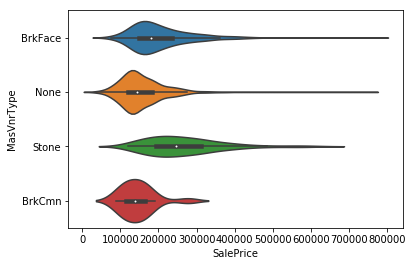

In [33]:
sns.violinplot(x="SalePrice", y='MasVnrType', data=ames)

In [34]:
mod = ols('SalePrice ~ MasVnrType',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F        PR(>F)
MasVnrType  1.713827e+12     3.0  111.67238  4.793331e-65
Residual    7.407445e+12  1448.0        NaN           NaN


In [35]:
group_mvt = ames.groupby('MasVnrType')
group_mvt.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
MasVnrType,,,,,,
BrkCmn,15,2194771,89471,277000,146318.066667,46187.583632
BrkFace,445,91087883,75000,755000,204691.871910,81214.293554
None,864,134975714,34900,745000,156221.891204,60708.262798
Stone,128,33994704,119000,611657,265583.625000,99940.156577


In [36]:
#percentages and missingness
print(round(100*group_mvt.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_mvt.size())))

MasVnrType
BrkCmn      1.0
BrkFace    30.5
None       59.2
Stone       8.8
dtype: float64

There are 8 missing values


In [37]:
ames.MasVnrType.fillna('None', inplace = True)
ames.MasVnrType = ['none' if mvt == 'None' else 'MasVnr' for mvt in ames.MasVnrType]

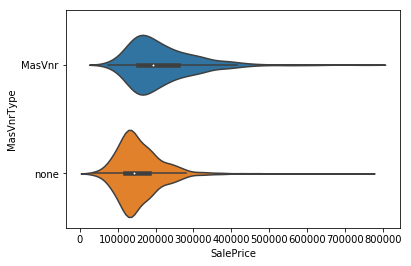

In [38]:
sns.violinplot(x="SalePrice", y='MasVnrType', data=ames)

In [39]:
#percentages and missingness
group_mvt2 = ames.groupby('MasVnrType')
print(round(100*group_mvt2.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_mvt2.size())))

MasVnrType
MasVnr    40.3
none      59.7
dtype: float64

There are 0 missing values


In [40]:
stats.ttest_ind(ames.SalePrice[ames.MasVnrType == 'MasVnr'], 
                ames.SalePrice[ames.MasVnrType == 'none'], equal_var = False)

Ttest_indResult(statistic=14.075255489896366, pvalue=4.919605879607003e-41)

# MasVnrArea

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


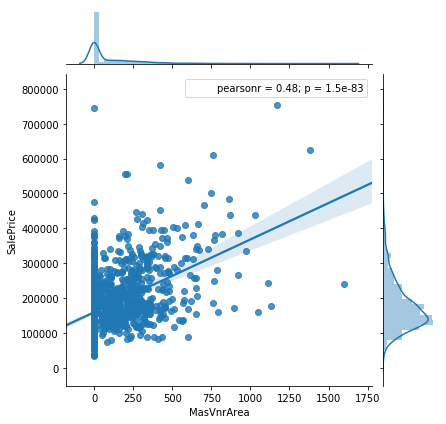

In [41]:
sns.jointplot(x='MasVnrArea', y='SalePrice', data=ames, kind="reg") 

In [42]:
#solve missingness problem. impute zeros, biven most are zeroes.

stats.linregress(ames.MasVnrArea, ames.SalePrice)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [43]:
group_mva = ames.groupby('MasVnrArea')
#percentages and missingness
print(round(100*group_mva.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_mva.size())))

MasVnrArea
0.0       59.0
1.0        0.1
11.0       0.1
14.0       0.1
16.0       0.5
18.0       0.1
22.0       0.1
24.0       0.1
27.0       0.1
28.0       0.1
30.0       0.1
31.0       0.1
32.0       0.1
34.0       0.1
36.0       0.1
38.0       0.1
40.0       0.3
41.0       0.1
42.0       0.2
44.0       0.2
45.0       0.1
46.0       0.1
48.0       0.1
50.0       0.2
51.0       0.1
53.0       0.1
54.0       0.1
56.0       0.1
57.0       0.1
60.0       0.1
          ... 
650.0      0.1
651.0      0.1
653.0      0.1
660.0      0.1
664.0      0.1
673.0      0.1
705.0      0.1
731.0      0.1
748.0      0.1
760.0      0.1
762.0      0.1
766.0      0.1
768.0      0.1
772.0      0.1
788.0      0.1
796.0      0.1
816.0      0.1
860.0      0.1
870.0      0.1
894.0      0.1
921.0      0.1
922.0      0.1
975.0      0.1
1031.0     0.1
1047.0     0.1
1115.0     0.1
1129.0     0.1
1170.0     0.1
1378.0     0.1
1600.0     0.1
Length: 327, dtype: float64

There are 8 missing values


In [44]:
ames.MasVnrArea.fillna(0, inplace = True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


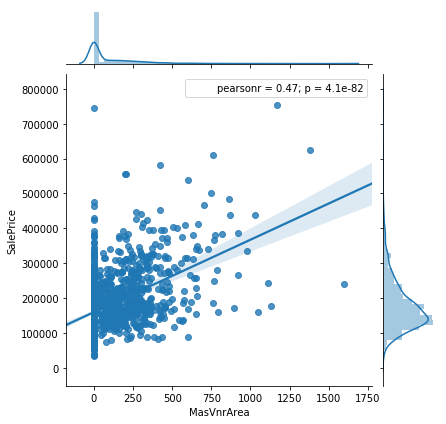

In [45]:
sns.jointplot(x='MasVnrArea', y='SalePrice', data=ames, kind="reg") 

In [46]:
stats.linregress(ames.MasVnrArea, ames.SalePrice)

LinregressResult(slope=207.74300555591512, intercept=159499.33477435028, rvalue=0.4726144990045738, pvalue=4.1004610445364737e-82, stderr=10.144934249404761)

In [47]:
# transform log(1+x) given zeros
ames.MasVnrArea = np.log1p(ames.MasVnrArea)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


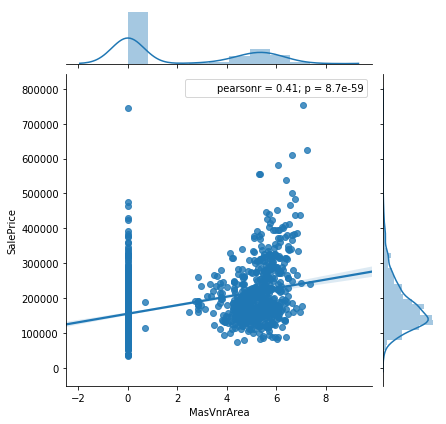

In [48]:
sns.jointplot(x='MasVnrArea', y='SalePrice', data=ames, kind="reg") 

# ExterQual

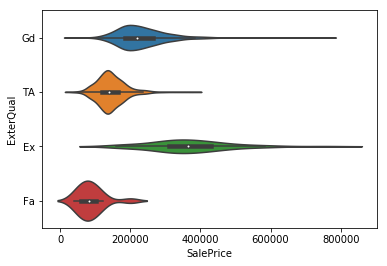

In [49]:
sns.violinplot(x="SalePrice", y='ExterQual', data=ames)

In [50]:
mod = ols('SalePrice ~ ExterQual',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F         PR(>F)
ExterQual  4.395744e+12     3.0  443.334831  1.439551e-204
Residual   4.812167e+12  1456.0         NaN            NaN


Note! Poor (Po) was not in this set. Possibly convert to binary? Gd/Ex and TA/Fa/Po?

In [51]:
group_eq = ames.groupby('ExterQual')
group_eq.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
ExterQual,,,,,,
Ex,52,19102770,160000,755000,367360.961538,116401.264200
Fa,14,1231793,39300,200000,87985.214286,39826.918794
Gd,488,113037153,52000,745000,231633.510246,71188.873899
TA,906,130773230,34900,381000,144341.313466,42471.815703


In [52]:
#percentages and missingness
print(round(100*group_eq.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_eq.size())))

ExterQual
Ex     3.6
Fa     1.0
Gd    33.4
TA    62.1
dtype: float64

There are 0 missing values


In [53]:
#Splitting on Good/Excellent = 'high' is good as it is more balanced and captures the original sales distributions

In [54]:
ames.ExterQual = ['high' if eq in ['Ex', 'Gd'] else 'low' for eq in ames.ExterQual]

In [55]:
group_eq2 = ames.groupby('ExterQual')
print(group_eq2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_eq2.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_eq2.size())))

           count        sum    min     max           mean           std
ExterQual                                                              
high         540  132139923  52000  755000  244703.561111  86412.228765
low          920  132005023  34900  381000  143483.720652  42970.455567
ExterQual
high    37.0
low     63.0
dtype: float64

There are 0 missing values


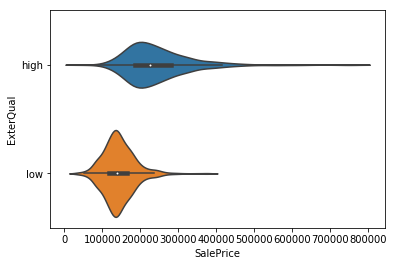

In [56]:
sns.violinplot(x="SalePrice", y='ExterQual', data=ames)

In [57]:
stats.ttest_ind(ames.SalePrice[ames.ExterQual == 'low'], 
                ames.SalePrice[ames.ExterQual == 'high'], equal_var = False)

Ttest_indResult(statistic=-25.436508721893812, pvalue=1.6234430165910786e-101)

# ExterCond

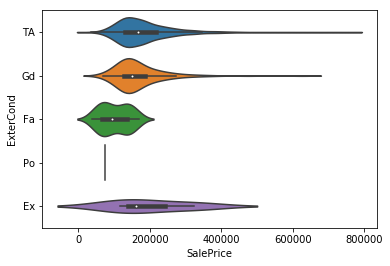

In [58]:
sns.violinplot(x="SalePrice", y='ExterCond', data=ames)

In [59]:
mod = ols('SalePrice ~ ExterCond',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F        PR(>F)
ExterCond  2.174690e+11     4.0  8.798714  5.106681e-07
Residual   8.990442e+12  1455.0       NaN           NaN


In [60]:
group_ecd = ames.groupby('ExterCond')
group_ecd.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
ExterCond,,,,,,
Ex,3,604000,118000,325000,201333.333333,109235.220205
Fa,28,2872664,39300,169500,102595.142857,40094.383940
Gd,146,24659045,68400,625000,168897.568493,72608.303632
Po,1,76500,76500,76500,76500.000000,NaN
TA,1282,235932737,34900,755000,184034.896256,79806.257233


In [61]:
#percentages and missingness
print(round(100*group_ecd.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_ecd.size())))

ExterCond
Ex     0.2
Fa     1.9
Gd    10.0
Po     0.1
TA    87.8
dtype: float64

There are 0 missing values


In [62]:
# Continue theme, split into Gd?ex as one and TA/Fa/Po below as "high" and "low"

In [63]:
ames.ExterCond = ['high' if ec in ['Ex', 'Gd'] else 'low' for ec in ames.ExterCond]

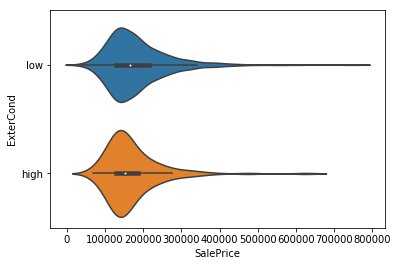

In [64]:
sns.violinplot(x="SalePrice", y='ExterCond', data=ames)

In [65]:
mod = ols('SalePrice ~ ExterCond',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df        F    PR(>F)
ExterCond  2.145359e+10     1.0  3.40494  0.065204
Residual   9.186458e+12  1458.0      NaN       NaN


In [66]:
stats.ttest_ind(ames.SalePrice[ames.ExterCond == 'low'], 
                ames.SalePrice[ames.ExterCond == 'high'], equal_var = False)

Ttest_indResult(statistic=1.9830372584594067, pvalue=0.04879894503330886)

# Foundation

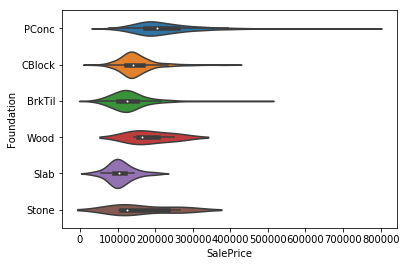

In [67]:
sns.violinplot(x="SalePrice", y='Foundation', data=ames)

In [68]:
mod = ols('SalePrice ~ Foundation',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df           F        PR(>F)
Foundation  2.360618e+12     5.0  100.253851  5.791895e-91
Residual    6.847294e+12  1454.0         NaN           NaN


In [69]:
group_fou = ames.groupby('Foundation')
group_fou.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
Foundation,,,,,,
BrkTil,146,19314497,37900,475000,132291.075342,54592.393032
CBlock,634,94976823,34900,402861,149805.714511,48295.041759
PConc,647,145724096,78000,755000,225230.442040,86865.977283
Slab,24,2576775,39300,198500,107365.625000,34213.980939
Stone,6,995755,102776,266500,165959.166667,78557.704413
Wood,3,557000,143000,250000,185666.666667,56695.090910


In [70]:
# I'd condense into "common" and "uncommon" as (CBlock, PConc) vs (the rest)

In [71]:
#percentages and missingness
print(round(100*group_fou.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_fou.size())))

Foundation
BrkTil    10.0
CBlock    43.4
PConc     44.3
Slab       1.6
Stone      0.4
Wood       0.2
dtype: float64

There are 0 missing values


OK, throwing back to my PBS days growing up, I remember watching This Old House. 
https://www.thisoldhouse.com/ideas/ground-foundations
They suggest that poured concrete is the way to go. 
Therefore, I'll select PConc vs Other for groupings

In [72]:
ames.Foundation = ['pconc' if fou == 'PConc' else 'other' for fou in ames.Foundation]

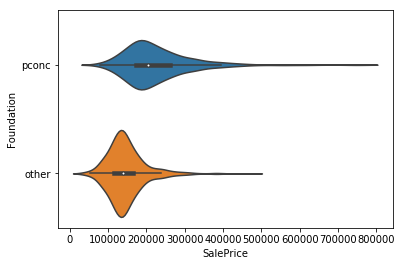

In [73]:
sns.violinplot(x="SalePrice", y='Foundation', data=ames)

In [74]:
group_fou2 = ames.groupby('Foundation')
group_fou2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
Foundation,,,,,,
other,813,118420850,34900,475000,145659.102091,50273.056145
pconc,647,145724096,78000,755000,225230.442040,86865.977283


In [75]:
stats.ttest_ind(ames.SalePrice[ames.Foundation == 'pconc'], 
                ames.SalePrice[ames.Foundation == 'other'], equal_var = False)

Ttest_indResult(statistic=20.703667269848356, pvalue=2.7623849837234417e-79)

# BsmtQual

['Gd' 'TA' 'Ex' nan 'Fa']
['Gd' 'TA' 'Ex' nan 'Fa']


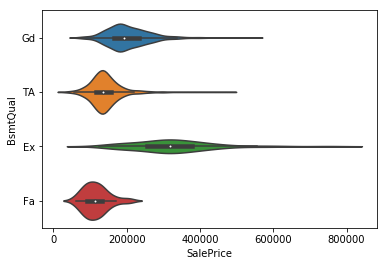

In [76]:
#height of basement 
print(ames.BsmtQual.unique())
#ames.BsmtQual.fillna('NB', inplace = True)
print(ames.BsmtQual.unique())
sns.violinplot(x="SalePrice", y='BsmtQual', data=ames)

In [77]:
mod = ols('SalePrice ~ BsmtQual',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F         PR(>F)
BsmtQual  4.066554e+12     3.0  392.913506  9.610615e-186
Residual  4.895429e+12  1419.0         NaN            NaN


In [78]:
group_bq = ames.groupby('BsmtQual')
group_bq.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
BsmtQual,,,,,,
Ex,121,39571966,123500,755000,327041.041322,113563.237392
Fa,35,4049221,61000,206900,115692.028571,34469.667278
Gd,618,125261480,75500,538000,202688.478964,58092.364284
TA,649,91353122,34900,475000,140759.818182,43483.265311


In [79]:
#percentages and missingness
print(round(100*group_bq.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bq.size())))

BsmtQual
Ex     8.3
Fa     2.4
Gd    42.3
TA    44.5
dtype: float64

There are 37 missing values


In [80]:
ames.BsmtQual = ['high' if bq in ['Ex', 'Gd'] else 'low' for bq in ames.BsmtQual]

In [81]:
group_bq = ames.groupby('BsmtQual')
print(group_bq.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_bq.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bq.size())))

          count        sum    min     max           mean           std
BsmtQual                                                              
high        739  164833446  75500  755000  223049.317997  83896.674216
low         721   99311500  34900  475000  137741.331484  43421.700974
BsmtQual
high    50.6
low     49.4
dtype: float64

There are 0 missing values


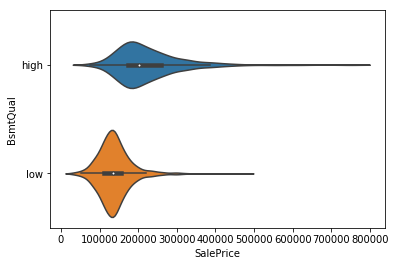

In [82]:
sns.violinplot(x="SalePrice", y='BsmtQual', data=ames)

In [83]:
stats.ttest_ind(ames.SalePrice[ames.BsmtQual == 'low'], 
                ames.SalePrice[ames.BsmtQual == 'high'], equal_var = False)

Ttest_indResult(statistic=-24.484286085957496, pvalue=2.9489615876684475e-106)

# BsmtCond

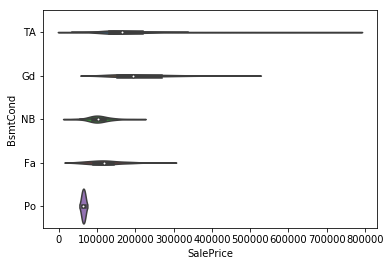

In [84]:
#general condition of basement
ames.BsmtCond.fillna('NB', inplace = True)
sns.violinplot(x="SalePrice", y='BsmtCond', data=ames)

In [85]:
mod = ols('SalePrice ~ BsmtCond',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
BsmtCond  4.732480e+11     4.0  19.708139  8.195794e-16
Residual  8.734663e+12  1455.0        NaN           NaN


In [86]:
group_bcond = ames.groupby('BsmtCond')
group_bcond.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
BsmtCond,,,,,,
Fa,45,5481429,55000,265979,121809.533333,43467.796975
Gd,65,13883994,119000,465000,213599.907692,72663.155026
NB,37,3909157,39300,198500,105652.891892,29278.694797
Po,2,128000,61000,67000,64000.000000,4242.640687
TA,1311,240742366,34900,755000,183632.620900,79515.388449


In [87]:
#percentages and missingness
print(round(100*group_bcond.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bcond.size())))

BsmtCond
Fa     3.1
Gd     4.5
NB     2.5
Po     0.1
TA    89.8
dtype: float64

There are 0 missing values


Difficult to generalize a "condition" binary here. Normal split is Gd/Ex. No Ex here. Split would roughly be 4.5% /95.5% which is not desireable from a balanced class situation. I'd still keep that split here, but inclusion in final dataset is dubious.

In [88]:
ames.BsmtCond = ['high' if bcond in ['Ex', 'Gd'] else 'low' for bcond in ames.BsmtCond]

In [89]:
group_bcond2 = ames.groupby('BsmtCond')
print(group_bcond2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_bcond2.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bcond2.size())))

          count        sum     min     max           mean           std
BsmtCond                                                               
high         65   13883994  119000  465000  213599.907692  72663.155026
low        1395  250260952   34900  755000  179398.531900  79440.962142
BsmtCond
high     4.5
low     95.5
dtype: float64

There are 0 missing values


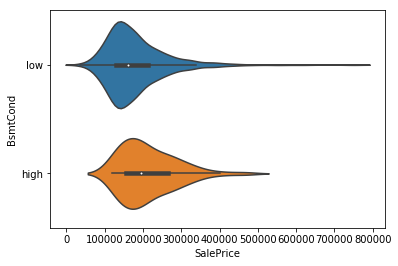

In [90]:
sns.violinplot(x="SalePrice", y='BsmtCond', data=ames)

In [91]:
stats.ttest_ind(ames.SalePrice[ames.BsmtCond == 'low'], 
                ames.SalePrice[ames.BsmtCond == 'high'], equal_var = False)

Ttest_indResult(statistic=-3.6933223025518385, pvalue=0.00043029371312352534)

# BsmtExposure

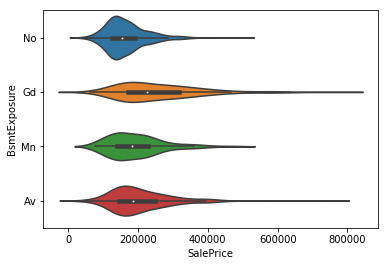

In [92]:
#ames.BsmtExposure.fillna('NB', inplace = True)
sns.violinplot(x="SalePrice", y='BsmtExposure', data=ames)

In [93]:
mod = ols('SalePrice ~ BsmtExposure',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df          F        PR(>F)
BsmtExposure  1.168770e+12     3.0  70.887984  1.022671e-42
Residual      7.793121e+12  1418.0        NaN           NaN


In [94]:
group_bex = ames.groupby('BsmtExposure')
group_bex.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
BsmtExposure,,,,,,
Av,221,45668196,35311,745000,206643.420814,88655.504849
Gd,134,34530434,61000,755000,257689.805970,118923.672583
Mn,114,21978021,78000,475000,192789.657895,77335.442652
No,953,157866638,34900,501837,165652.295908,60695.724915


In [95]:
#percentages and missingness
print(round(100*group_bex.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bex.size())))

BsmtExposure
Av    15.1
Gd     9.2
Mn     7.8
No    65.3
dtype: float64

There are 38 missing values


In [96]:
#what are the missing values? evaluate total bsmt sf
ames[ames.BsmtExposure.isnull()]['TotalBsmtSF']

17        0
39        0
90        0
102       0
156       0
182       0
259       0
342       0
362       0
371       0
392       0
520       0
532       0
533       0
553       0
646       0
705       0
736       0
749       0
778       0
868       0
894       0
897       0
948     936
984       0
1000      0
1011      0
1035      0
1045      0
1048      0
1049      0
1090      0
1179      0
1216      0
1218      0
1232      0
1321      0
1412      0
Name: TotalBsmtSF, dtype: int64

In [97]:
# generally, the null BsmtExposure is equivalent to not having a basement
# one case of having some basement though
# I'd interpret null as being very unlikely for having a basement 

In [98]:
# Condense Mn, No, NB as "less" and Av and Gd as "more"
ames.BsmtExposure = ['high' if bex in ['Av', 'Gd'] else 'low' for bex in ames.BsmtExposure]

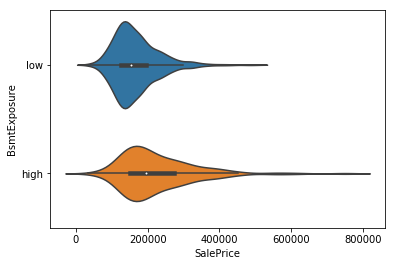

In [99]:
sns.violinplot(x="SalePrice", y='BsmtExposure', data=ames)

In [100]:
group_bex2 = ames.groupby('BsmtExposure')
print(group_bex2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_bex2.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bex2.size())))

              count        sum    min     max           mean            std
BsmtExposure                                                               
high            355   80198630  35311  755000  225911.633803  103981.785331
low            1105  183946316  34900  501837  166467.254299   63352.635003
BsmtExposure
high    24.3
low     75.7
dtype: float64

There are 0 missing values


In [101]:
stats.ttest_ind(ames.SalePrice[ames.BsmtExposure == 'low'], 
                ames.SalePrice[ames.BsmtExposure == 'high'], equal_var = False)

Ttest_indResult(statistic=-10.181293422777184, pvalue=5.209866433713583e-22)

# BsmtFinType1

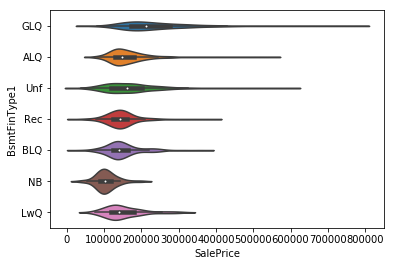

In [102]:
ames.BsmtFinType1.fillna('NB', inplace = True)
sns.violinplot(x="SalePrice", y='BsmtFinType1', data=ames)

In [103]:
mod = ols('SalePrice ~ BsmtFinType1',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df        F        PR(>F)
BsmtFinType1  1.941124e+12     6.0  64.6882  2.386358e-71
Residual      7.266788e+12  1453.0      NaN           NaN


In [104]:
group_bft1 = ames.groupby('BsmtFinType1')
group_bft1.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
BsmtFinType1,,,,,,
ALQ,220,35546075,81000,538000,161573.068182,50821.277231
BLQ,148,22125061,35311,359100,149493.655405,47327.292126
GLQ,418,98402935,80000,755000,235413.720096,93215.613258
LwQ,74,11237100,75500,301000,151852.702703,50796.987083
NB,37,3909157,39300,198500,105652.891892,29278.694797
Rec,133,19536270,34900,381000,146889.248120,45190.118879
Unf,430,73388348,37900,582933,170670.576744,72577.080129


In [105]:
#percentages and missingness
print(round(100*group_bft1.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bft1.size())))

BsmtFinType1
ALQ    15.1
BLQ    10.1
GLQ    28.6
LwQ     5.1
NB      2.5
Rec     9.1
Unf    29.5
dtype: float64

There are 0 missing values


In [106]:
# Condense into "developed" and "not-developed" (inclues No Basement) 
# This means combine (GLQ, ALQ, BLQ, Rec) and (LwQ, Unf, NB)
ames.BsmtFinType1 = ['undeveloped' if bt in ['Unf', 'LwQ', 'NB'] else 'developed' for bt in ames.BsmtFinType1]

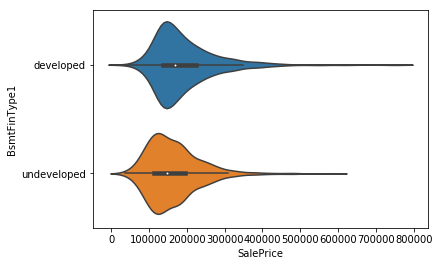

In [107]:
sns.violinplot(x="SalePrice", y='BsmtFinType1', data=ames)

In [108]:
group_bft1_ = ames.groupby('BsmtFinType1')
print(group_bft1_.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_bft1_.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bft1_.size())))

              count        sum    min     max           mean           std
BsmtFinType1                                                              
developed       919  175610341  34900  755000  191088.510337  82950.948254
undeveloped     541   88534605  37900  582933  163649.916821  69853.051267
BsmtFinType1
developed      62.9
undeveloped    37.1
dtype: float64

There are 0 missing values


In [109]:
stats.ttest_ind(ames.SalePrice[ames.BsmtFinType1 == 'developed'], 
                ames.SalePrice[ames.BsmtFinType1 == 'undeveloped'], equal_var = False)

Ttest_indResult(statistic=6.753554443170129, pvalue=2.1783034762888857e-11)

# BsmtFinSF1

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


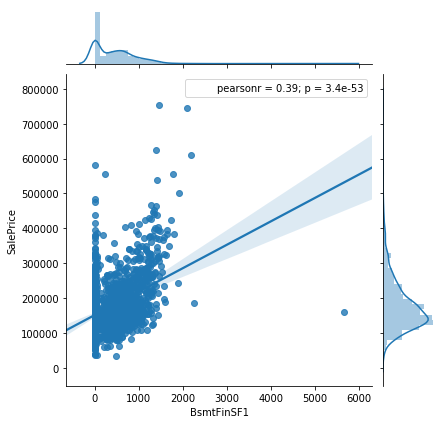

In [110]:
sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=ames, kind="reg") 

In [111]:
stats.linregress(ames.BsmtFinSF1, ames.SalePrice)

LinregressResult(slope=67.30604049404644, intercept=151061.56252564327, rvalue=0.38641980624215333, pvalue=3.394109829288395e-53, stderr=4.207256065345132)

In [112]:
# For this, if BsmtFinSF1 == 0, drop it. It means there is no basement! It's totally skewing the scatterplot.
# Looks like this could be a promising feature

# BsmtFinType2

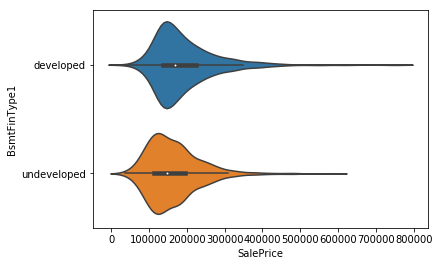

In [113]:
ames.BsmtFinType2.fillna('NB', inplace = True)
sns.violinplot(x="SalePrice", y='BsmtFinType1', data=ames)

In [114]:
mod = ols('SalePrice ~ BsmtFinType2',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df         F        PR(>F)
BsmtFinType2  2.789443e+11     6.0  7.565378  5.225649e-08
Residual      8.928967e+12  1453.0       NaN           NaN


In [115]:
group_bft2 = ames.groupby('BsmtFinType2')
group_bft2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
BsmtFinType2,,,,,,
ALQ,19,3988900,123500,555000,209942.105263,104764.743411
BLQ,33,4986333,62383,271900,151101.000000,41611.305388
GLQ,14,2533750,75500,270000,180982.142857,64573.040359
LwQ,46,7560750,88000,287000,164364.130435,43255.035241
NB,38,4193157,39300,284000,110346.236842,40879.307312
Rec,54,8905525,85000,402000,164917.129630,59183.277020
Unf,1256,231976531,34900,755000,184694.690287,81275.313909


In [116]:
ames.BsmtFinType2 = ['undeveloped' if bt in ['Unf', 'LwQ', 'NB'] else 'developed' for bt in ames.BsmtFinType2]

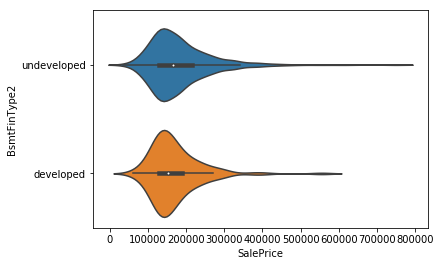

In [117]:
sns.violinplot(x="SalePrice", y='BsmtFinType2', data=ames)

In [118]:
group_bft2_ = ames.groupby('BsmtFinType2')
print(group_bft2_.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print(round(100*group_bft2_.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_bft2_.size())))

              count        sum    min     max           mean           std
BsmtFinType2                                                              
developed       120   20414508  62383  555000  170120.900000  67238.267559
undeveloped    1340  243730438  34900  755000  181888.386567  80396.065338
BsmtFinType2
developed       8.2
undeveloped    91.8
dtype: float64

There are 0 missing values


In [119]:
stats.ttest_ind(ames.SalePrice[ames.BsmtFinType2 == 'developed'], 
                ames.SalePrice[ames.BsmtFinType2 == 'undeveloped'], equal_var = False)

Ttest_indResult(statistic=-1.8050840250333113, pvalue=0.07305125913003506)

In [120]:
# worth dropping this as p > 0.05
# basically, very few multiple finished types
# and look at the following scatterplot
# if zeroes were removed, still would be a near zero trend

# BsmtFinSF2

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


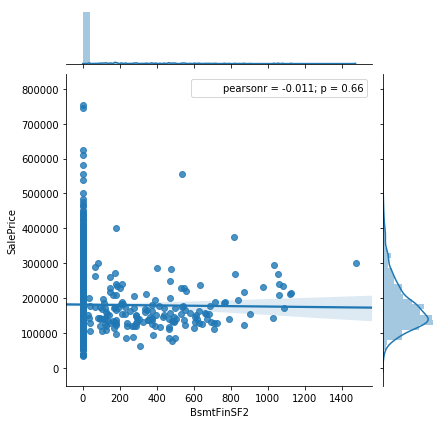

In [121]:
sns.jointplot(x='BsmtFinSF2', y='SalePrice', data=ames, kind="reg") 

In [122]:
stats.linregress(ames.BsmtFinSF2, ames.SalePrice)

LinregressResult(slope=-5.603214237114362, intercept=181182.02167533064, rvalue=-0.011378121450215144, pvalue=0.6639986508340906, stderr=12.896141412082699)

In [123]:
print(round(100*group_mva.size()/total,1))


MasVnrArea
0.0       59.0
1.0        0.1
11.0       0.1
14.0       0.1
16.0       0.5
18.0       0.1
22.0       0.1
24.0       0.1
27.0       0.1
28.0       0.1
30.0       0.1
31.0       0.1
32.0       0.1
34.0       0.1
36.0       0.1
38.0       0.1
40.0       0.3
41.0       0.1
42.0       0.2
44.0       0.2
45.0       0.1
46.0       0.1
48.0       0.1
50.0       0.2
51.0       0.1
53.0       0.1
54.0       0.1
56.0       0.1
57.0       0.1
60.0       0.1
          ... 
650.0      0.1
651.0      0.1
653.0      0.1
660.0      0.1
664.0      0.1
673.0      0.1
705.0      0.1
731.0      0.1
748.0      0.1
760.0      0.1
762.0      0.1
766.0      0.1
768.0      0.1
772.0      0.1
788.0      0.1
796.0      0.1
816.0      0.1
860.0      0.1
870.0      0.1
894.0      0.1
921.0      0.1
922.0      0.1
975.0      0.1
1031.0     0.1
1047.0     0.1
1115.0     0.1
1129.0     0.1
1170.0     0.1
1378.0     0.1
1600.0     0.1
Length: 327, dtype: float64


Mostly zero here. just add it to BsmtFinSF1

# BsmtUnfSF

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


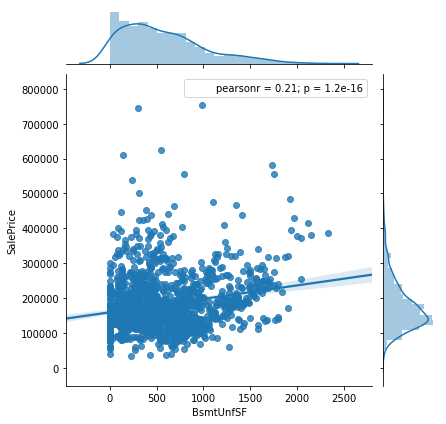

In [124]:
sns.jointplot(x='BsmtUnfSF', y='SalePrice', data=ames, kind="reg") 

In [125]:
stats.linregress(ames.BsmtUnfSF, ames.SalePrice)

LinregressResult(slope=38.560830939388794, intercept=159047.93430143522, rvalue=0.21447910554696895, pvalue=1.1829757963593982e-16, stderr=4.598927111832803)

# TotalBsmtSf

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


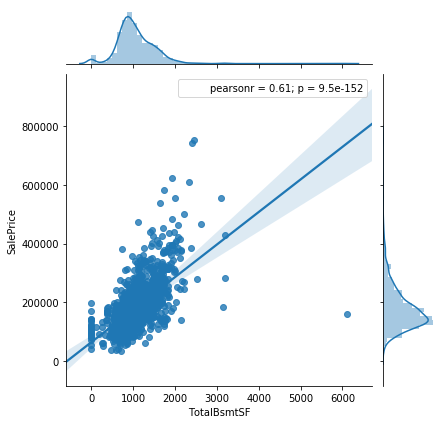

In [126]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=ames, kind="reg") 

How does TotalBsmtSf relate to the combination of Finished1 + Finished2 + Unfinished ?

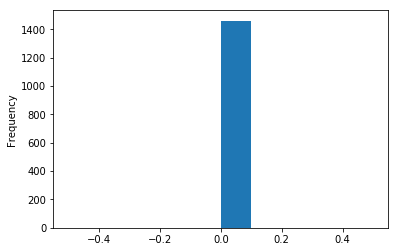

In [127]:
sum_bsmt = (ames.BsmtFinSF1 + ames.BsmtFinSF2 + ames.BsmtUnfSF)
diff_bsmt = ames.TotalBsmtSF - sum_bsmt
diff_bsmt.plot(kind='hist')

In [128]:
diff_bsmt.max(), diff_bsmt.min()

(0, 0)

In [129]:
#perfect match. 

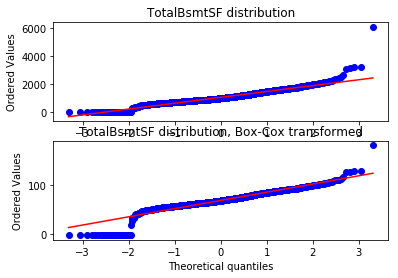

In [147]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(ames.TotalBsmtSF, dist = stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('TotalBsmtSF distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(ames.TotalBsmtSF + 1e-9)
stats.probplot(xt, dist = stats.norm, plot = ax2)
ax2.set_title('TotalBsmtSF distribution, Box-Cox transformed')
plt.show()

In [ ]:
#no great answer here. Even doing BC transformation results in some non-normality.

# Heating

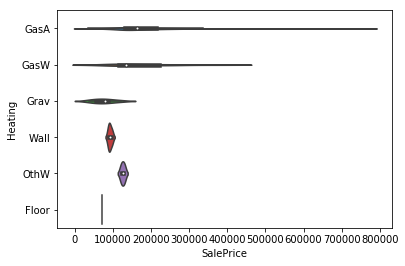

In [130]:
sns.violinplot(x="SalePrice", y='Heating', data=ames)

In [131]:
group_heat = ames.groupby('Heating')
group_heat.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
Heating,,,,,,
Floor,1,72500,72500,72500,72500.000000,NaN
GasA,1428,259926267,34900,755000,182021.195378,79262.873587
GasW,18,2999379,82000,375000,166632.166667,78547.575324
Grav,7,526900,37900,121000,75271.428571,28066.570524
OthW,2,251500,122000,129500,125750.000000,5303.300859
Wall,4,368400,87500,98000,92100.000000,4509.988914


In [132]:
#percentages and missingness
print(round(100*group_heat.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_heat.size())))

Heating
Floor     0.1
GasA     97.8
GasW      1.2
Grav      0.5
OthW      0.1
Wall      0.3
dtype: float64

There are 0 missing values


In [133]:
# > 97% is 'GasA' so unequal classes will be difficult to fix.
# drop

# HeatingQC

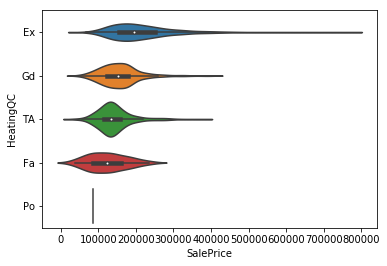

In [134]:
sns.violinplot(x="SalePrice", y='HeatingQC', data=ames)

In [135]:
group_heatqc = ames.groupby('HeatingQC')
group_heatqc.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
HeatingQC,,,,,,
Ex,741,159251592,66500,755000,214914.429150,87469.704503
Fa,49,6072055,37900,235000,123919.489796,50306.618996
Gd,241,37802988,52000,395000,156858.871369,52923.920003
Po,1,87000,87000,87000,87000.000000,NaN
TA,428,60931311,34900,375000,142362.876168,47226.485663


In [136]:
#percentages and missingness
print(round(100*group_heatqc.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_heatqc.size())))

HeatingQC
Ex    50.8
Fa     3.4
Gd    16.5
Po     0.1
TA    29.3
dtype: float64

There are 0 missing values


In [137]:
ames.HeatingQC = ['high' if hqc in ['Ex', 'Gd'] else 'low' for hqc in ames.HeatingQC]

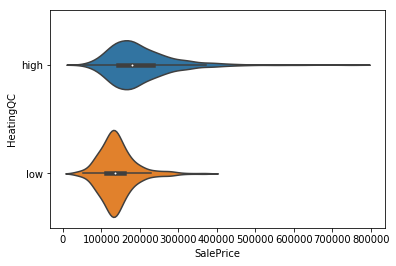

In [138]:
sns.violinplot(x="SalePrice", y='HeatingQC', data=ames)

In [139]:
group_heatqc2 = ames.groupby('HeatingQC')
print(group_heatqc2.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice'])
print("\n")
print(round(100*group_heatqc2.size()/total,1))
print("\nThere are {} missing values".format(total - sum(group_heatqc2.size())))

           count        sum    min     max           mean           std
HeatingQC                                                              
high         982  197054580  52000  755000  200666.578411  84151.088669
low          478   67090366  34900  375000  140356.414226  47838.834696


HeatingQC
high    67.3
low     32.7
dtype: float64

There are 0 missing values


In [140]:
stats.ttest_ind(ames.SalePrice[ames.HeatingQC == 'low'], 
                ames.SalePrice[ames.HeatingQC == 'high'], equal_var = False)

Ttest_indResult(statistic=-17.41078651322312, pvalue=1.0519708475944648e-61)